#Composite Systems
Composite systems in quantum mechanics refer to systems composed of multiple individual quantum systems. When these systems interact or are combined, their overall quantum state is described by a joint state that incorporates the states of each individual system.

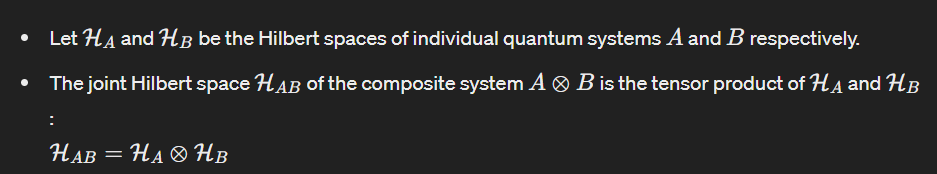

In [1]:
import numpy as np
from scipy.linalg import kron

# Define the basis vectors for system A and B
basis_A = np.array([1, 0])  # Basis vector for system A
basis_B = np.array([0, 1])  # Basis vector for system B

# Create the joint state vector for the composite system AB
state_A = basis_A[:, np.newaxis]  # Reshape as column vector
state_B = basis_B[:, np.newaxis]
state_AB = np.kron(state_A, state_B)

print("Joint state vector for AB:")
print(state_AB)

Joint state vector for AB:
[[0]
 [1]
 [0]
 [0]]


#Tensor Product States; Quantum Entanglement
Tensor product states are states of composite quantum systems that can be expressed as tensor products of states of individual subsystems. Quantum entanglement arises when the resulting composite state cannot be factorized into separate states of its subsystems.

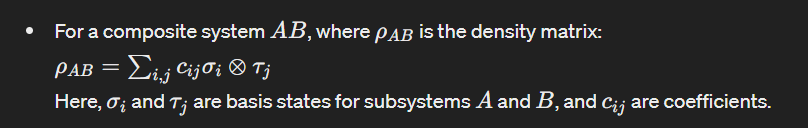

In [3]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00
INFO: pip is looking a

In [4]:
import cirq
import numpy as np

# Create a circuit with two qubits
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()

# Apply Hadamard gate to qubit 0
circuit.append(cirq.H(q0))

# Apply CNOT gate with qubit 0 as control and qubit 1 as target
circuit.append(cirq.CNOT(q0, q1))

# Simulate the circuit to obtain the state vector
simulator = cirq.Simulator()
result = simulator.simulate(circuit)

# Extract the final state vector
statevector = result.final_state_vector

# Compute the density matrix
density_matrix = np.outer(statevector, np.conj(statevector))

print("Density Matrix of the Entangled State:")
print(density_matrix)

Density Matrix of the Entangled State:
[[0.49999997+0.j 0.        +0.j 0.        +0.j 0.49999997+0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.49999997+0.j 0.        +0.j 0.        +0.j 0.49999997+0.j]]


#Density Matrices

 Density matrices are used in quantum mechanics to describe the state of a quantum system, especially in scenarios where the system might be in a mixed state (i.e., a statistical ensemble of quantum states rather than a pure state).

In [5]:
import numpy as np

# Example of constructing a density matrix for a pure state
psi = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # Example pure state
rho = np.outer(psi, psi.conj())  # Construct density matrix from outer product
print("Density Matrix for the Pure State:")
print(rho)

Density Matrix for the Pure State:
[[0.5 0.5]
 [0.5 0.5]]


#Quantum Information
Quantum information theory deals with the processing and transmission of information using quantum systems. It encompasses quantum computation, quantum communication, and quantum cryptography, utilizing the principles of quantum mechanics to manipulate and transmit information.

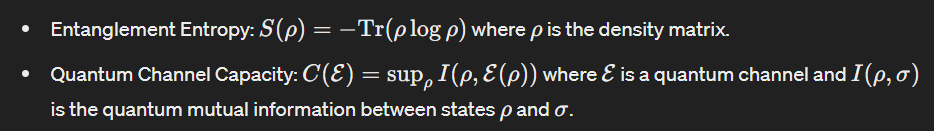

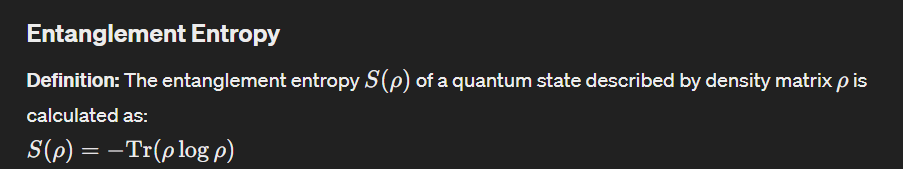

In [7]:
import cirq
import numpy as np
from scipy.linalg import logm

# Define a random 2-qubit quantum state
rho = np.array([[0.3, 0, 0, 0],
                [0, 0.2, 0, 0],
                [0, 0, 0.1, -0.3j],
                [0, 0, 0.3j, 0.4]])

# Compute the von Neumann entropy of the state
entropy = -np.trace(np.dot(rho, logm(rho)))

print("Entanglement Entropy:")
print(entropy)


Entanglement Entropy:
(0.7863990807270913+0.26832404625866085j)


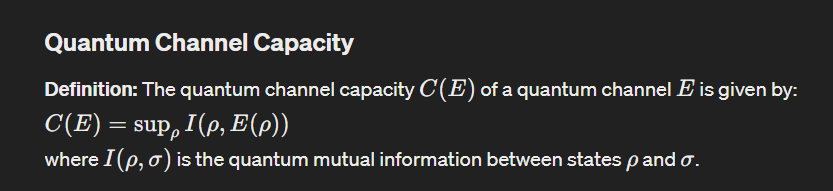

In [8]:
import cirq
import numpy as np
from scipy.linalg import logm

# Define a quantum channel as a unitary operation
def quantum_channel(rho):
    # Define a random unitary matrix as a quantum channel
    U = cirq.testing.random_unitary(4)
    sigma = np.dot(np.dot(U, rho), np.conj(U.T))  # Apply the channel to the input state rho
    return sigma

# Define a function to compute the quantum mutual information
def quantum_mutual_information(rho, sigma):
    return np.trace(np.dot(rho, logm(sigma)))

# Simulate the quantum channel and compute the quantum channel capacity
max_mutual_information = -np.inf

# Iterate over possible input states (density matrices)
for _ in range(10):
    rho = cirq.testing.random_density_matrix(4)  # Random 4x4 density matrix (for a 2-qubit system)
    sigma = quantum_channel(rho)  # Apply the quantum channel
    mutual_information = quantum_mutual_information(rho, sigma)  # Compute the mutual information
    if mutual_information > max_mutual_information:
        max_mutual_information = mutual_information

# Quantum channel capacity is the maximum mutual information observed
channel_capacity = max_mutual_information

print("Quantum Channel Capacity:")
print(channel_capacity)

Quantum Channel Capacity:
(-1.540706233257724-4.85722573273506e-16j)
